# <center> <font style="color:rgb(100,109,254)">Blurring Methods</font>  <center>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## <font style="color:rgb(134,19,348)"> Why Blur the Image    </font>

Its very common to blurr/smooth an image, this will reduces noise in the image. The noise can be present due to various factors like the sensor by which you took the picture was corrupted or it malfunctioned, or enviromental factors like the lightning was poor etc. Now there are different types of blurring to deal with different types of noises 

## <font style="color:rgb(134,19,348)"> Manual Blurring or 2D Covolution:     </font>
You are already familiar with `cv2.filter2D` to blurr an image

In [ ]:
img = cv2.imread('media/M3/studyblur.jpg')

kernel = np.ones((5,5),np.float32)/25

dst = cv2.filter2D(img,-1,kernel)

## <font style="color:rgb(134,19,348)">  Averaging Blur   </font>
Since blurring is so common, Opencv already has a function which blurs an image. Now we are going to perform the same blurring we did above but with `cv2.blur()`. The Only thing we actually need to specify other than the input image is the kernel size.

  [```dst = cv2.blur(src, ksize[, dst[, anchor[, borderType]]])```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37)

- **`src`**	input image; it can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- **`dst`**	output image of the same size and type as src.
- **`ksize`**	blurring kernel size.
- **`anchor`**	anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.
- **`borderType`**	border mode used to extrapolate pixels outside of the image.

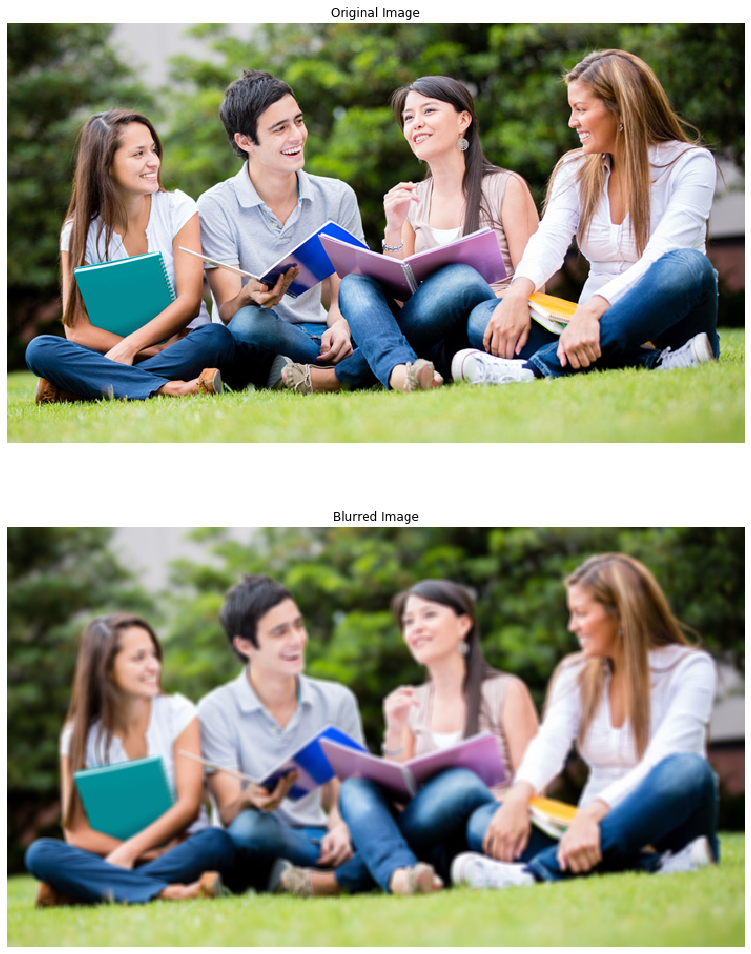

In [5]:
image = cv2.imread('media/M3/studyblur.jpg')

blur = cv2.blur(image,(5,5))

plt.figure(figsize=[17,17])
plt.subplot(211);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
plt.subplot(212);plt.imshow(blur[:,:,::-1]);plt.title("Blurred Image");plt.axis('off');

## <font style="color:rgb(134,19,348)"> Gaussian Blur    </font>
When the image contains Gaussian like noise then its better to use Gaussian blur, which uses a Gaussian kernel instead of a normal one, the kerenl specified should be an odd number. 

The intuition behind the Gaussian kernel is pretty simple As you remember the box kernel that we have used before gives equal weight to all the values/weight in the kernel whereas a Guassian kernel weights the contribution of the neighboring pixels based on the pixel's distance from the center pixel.

The Gaussian kernel is not uniform the middle pixel gets the maximum weight while the pixels farther away from center are given less weight.

 **Example Gaussian kernel** 

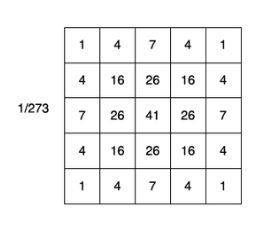

**Note:** The image will look less blurry if you use Gaussian blurring instead of the box kernel, also Small amount of Gaussian blurring is often used to remove noise from an image. It is also very commonly applied to an image prior to many operations, if you are gonna do some noise sensitive operation on the image, like noise sensitive image filtering. Consider a sobel kernel in which Gaussian blurring is used to remove noise prior to applying the difference kernel.


[```dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)


- **`src`**	input image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
- **`dst`**	output image of the same size and type as src.
- **`ksize`**	Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero's and then they are computed from sigma.
- **`sigmaX`**	Gaussian kernel standard deviation in X direction.
- **`sigmaY`**	Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height, respectively; to fully control the result regardless of possible future modifications of all this semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.
- **`borderType`**	pixel extrapolation method.

You should specify standard deviation in X and Y direction, which are sigmaX and sigmaY respectively. If you only specify sigmaX then sigmaY is taken as same as sigmaX. If both are given as zeros, then they are calculated from kernel size. 

Most of the times sigmaX and sigmaY are the same. And you may also want to leave that at `0` so you can control the gaussian blur with just one parameter.

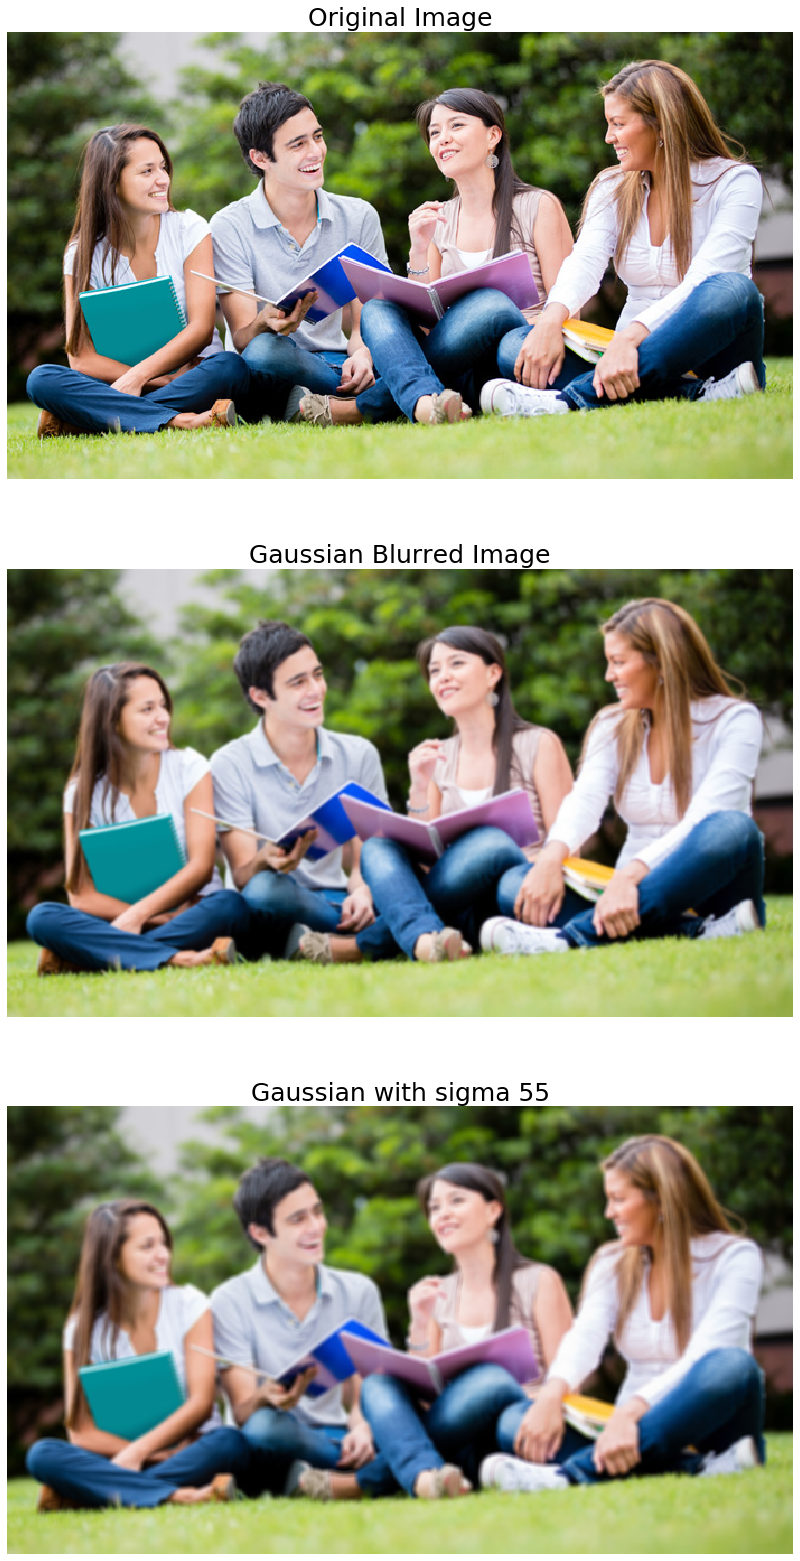

In [6]:
gblur = cv2.GaussianBlur(img,(5,5),0)
gsigma = cv2.GaussianBlur(img,(5,5),55)


plt.figure(figsize=[28,28])
plt.subplot(311);plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(312);plt.imshow(gblur[:,:,::-1]);plt.title("Gaussian Blurred Image",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(313);plt.imshow(gsigma[:,:,::-1]);plt.title("Gaussian with sigma 55",fontdict={'fontsize': 25});plt.axis('off');

## <font style="color:rgb(134,19,348)">  Median Blurring   </font>

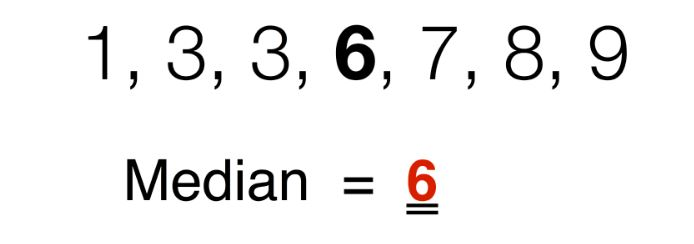


Median Blurring takes median of all the pixels under kernel area and the central element is replaced with this median value. Now this proves highly effective against salt-and-pepper noise (random black and white spots on image) in the images. One Interesting to note is that in all the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. This reduces the noise effectively, the kernel size should be a positive odd integer.

See below how a kernel that falls on a black noise `0` is removed by first making the kernel values in increasing order and then taking the median of the values


$$
\begin{bmatrix}
222 & 225 & 221\\
221 & 0 & 225\\
225 & 220 & 223
\end{bmatrix}
$$


As you can see the center value is really different (lower) than its neighbors. In this case the center pixel is noise and so if we take the median we can remove this noise.

First set them in increasing order

$$[0, 220, 221, 221, 222, 223, 225, 225, 225]$$
<br>

We can see the median is 222 so we will replace the center value `0` with `222` 
<br>
<br>


$$
\begin{bmatrix}
222 & 225 & 221\\
221 & 222 & 225\\
225 & 220 & 223
\end{bmatrix}
$$

And now the noise is gone, note if you would have performed a box filter which takes an average of the kernel values and then replaces the average then that would not have replaced the center correctly. In this case it would have given me `198`.

<br>
<br>

**Syntax**

[```dst = cv2.medianBlur(src, ksize[, dst])```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9)

- **`src`**	input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
- **`dst`**	destination array of the same size and type as src.
- **`ksize`**	aperture linear size; it must be odd and greater than 1, for example: 3, 5,7, ...

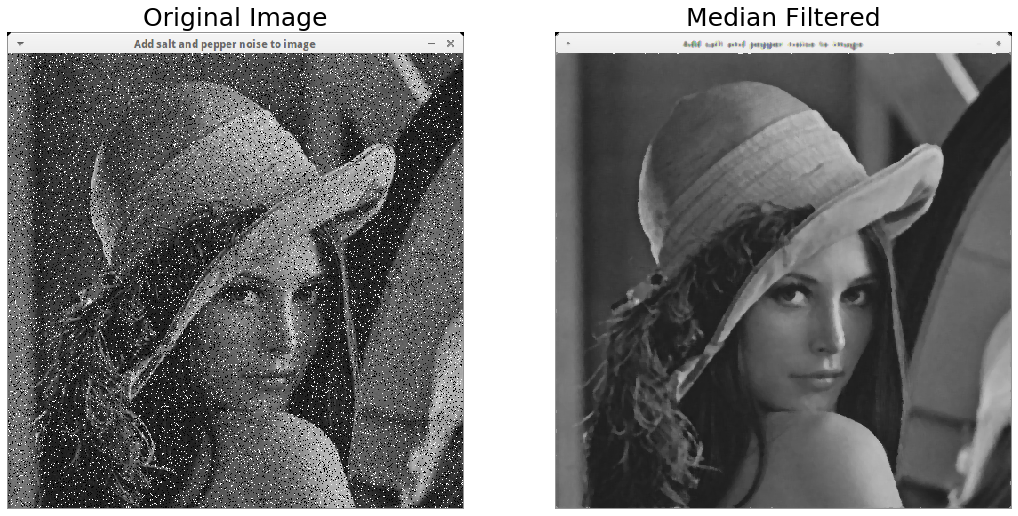

In [7]:
image = cv2.imread('media/M3/lisanoise.png')
median = cv2.medianBlur(image,5)

plt.figure(figsize=[18,18])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(122);plt.imshow(median [:,:,::-1]);plt.title("Median Filtered",fontdict={'fontsize': 25});plt.axis('off');

## <font style="color:rgb(134,19,348)">Bilateral Blurring     </font>

Bilateral Blurring is highly effective in noise removal while keeping edges sharp. But it is slower when compared to other filters. We have seen that gaussian filter takes the a neighborhood around the pixel and find its gaussian weighted average. This gaussian filter is a function of space which means nearby pixels are considered while filtering. It does not take into account if those pixels have almost same intensity or not, meaning it doesn't consider whether pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filter not only takes a gaussian filter in space, but it takes one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference makes sure only those pixels with similar intensity to central pixel is considered for blurring. So what ends up happening is that it preserves the edges since pixels at edges will have large intensity variation.

Consider the below 3 x 3 patch

$$
\begin{bmatrix}
60 & 64 & 63\\
222 & 220 & 235\\
212 & 210 & 233
\end{bmatrix}
$$

Now see the top row, the values are much different than the rest, it tells us that we are seeing a horizontal edge. Now during bilateral filter operation the weightage given to the top row will be much less when modifying the central `220` value.


So in summary a Bilateral filter is a non linear, edge preserving, smoothing filter

[```dst = cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[,borderType]])```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed)



- **`src`**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **`dst`**	Destination image of the same size and type as src .
- **`d`**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **`sigmaColor`**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **`sigmaSpace`**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **`borderType`**	border mode used to extrapolate pixels outside of the image, see BorderTypes

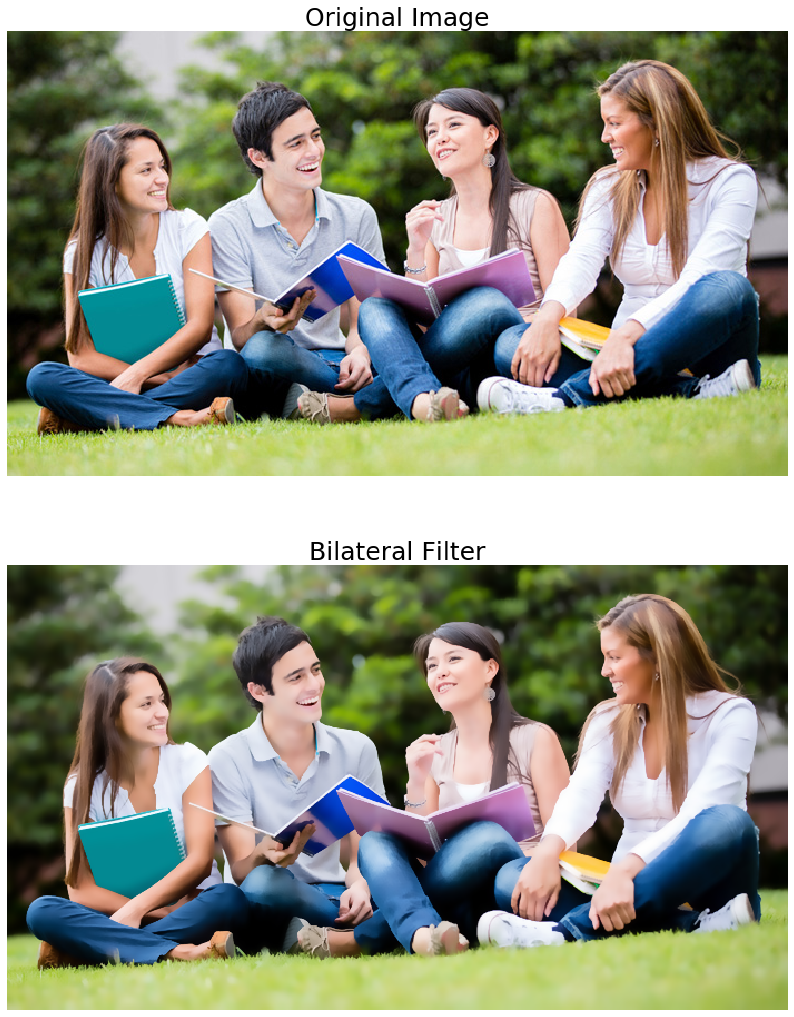

In [8]:
image = cv2.imread('media/M3/studyblur.jpg')

SigmaColor = 60
SigmaSpace = 60

bi_blur = cv2.bilateralFilter(image,9,SigmaColor,SigmaSpace)

plt.figure(figsize=[18,18])
plt.subplot(211);plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(212);plt.imshow(bi_blur[:,:,::-1]);plt.title("Bilateral Filter",fontdict={'fontsize': 25});plt.axis('off');

## <font style="color:rgb(134,19,348)"> Comparasion Chart of Blurring Filters    </font>
<br><br>
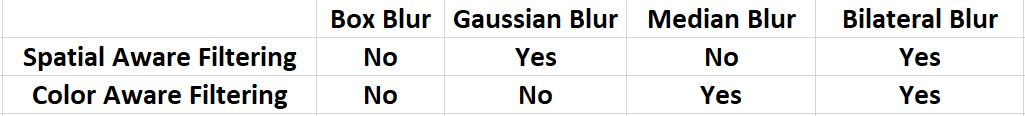

Now Note if you want to preserve edges and still remove gaussian noise then you should use a bilateral filter, and although a bilateral filter can remove salt and pepper noise but the results are better obtained by a median filter for that.